## Метод Рунге-Кутта-Мерсона

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Runge_Kutta(a, b, h, f, ya):
    nodes = np.arange(a, b+1e-15, h)[1:]
    N = len(nodes)
    yi = []
    yn = ya
    for i in range(N):
        yi.append(yn)
        t = nodes[i]
        k1 = f(t, yn)
        k2 = f(t + h/3, yn + h*k1/3)
        k3 = f(t + h/3, yn + h*k1/6 + h*k2/6)
        k4 = f(t + h/2, yn + h*k1/8 + 3*h*k3/8)
        k5 = f(t + h, yn + h*k1/2 - 3*h*k3/2 + 2*h*k4)
        yn = yn + h*(k1 + 4*k4 + k5)/6
    yi.append(yn)
    return np.array(yi)

def error(nodes, y_calc, y_precise):
    y_precise_mat = []
    for t in nodes:
        y_precise_mat.append([func(t) for func in y_precise])
    y_precise = np.array(y_precise_mat)

    errors = []

    for i in range(len(nodes)):
        errors.append(max(abs(y_calc[i] - y_precise[i])))

    return np.array(errors)

## Тестовая задача

In [3]:
def f(t, y):
    return np.array([
        1/(2+2*t)*y[0] - 2*t*y[1],
        2*t*y[0] + y[1]/(2+2*t)
    ])

In [4]:
a, b, N = 0, 2, 100
h = (b-a)/N

y_precise = np.array([lambda t: np.cos(t*t)*np.sqrt(1+t), 
                      lambda t: np.sin(t*t)*np.sqrt(1+t)])
ya = np.array([y_precise[0](a), y_precise[1](a)])

y_calc = Runge_Kutta(a, b, h, f, ya)
nodes = np.arange(a, b+1e-15, h)
print(error(nodes, y_calc, y_precise))

[0.         0.00080773 0.00163045 0.00246749 0.00331818 0.00418184
 0.00505777 0.00594525 0.00684351 0.00775175 0.0086691  0.00959461
 0.01052724 0.01146587 0.01240927 0.01335607 0.01430478 0.01525377
 0.01620124 0.01714523 0.01808359 0.019014   0.01993389 0.02084054
 0.02173094 0.0226019  0.02344997 0.02427143 0.02506234 0.02581848
 0.02653537 0.02720826 0.02783213 0.02840172 0.02891147 0.0293556
 0.02972807 0.03002259 0.03023267 0.03035162 0.03077056 0.03267208
 0.03463039 0.03664149 0.03870076 0.04080286 0.04294175 0.04511063
 0.04730191 0.0495072  0.05171728 0.05392208 0.05611068 0.05827129
 0.06039124 0.06245699 0.06445417 0.06636755 0.06818111 0.06987804
 0.07144082 0.07285129 0.07409066 0.07513965 0.07597859 0.07658746
 0.0769461  0.07703429 0.07683194 0.07631921 0.07547675 0.07428582
 0.0727286  0.07078833 0.06844955 0.06866552 0.07373578 0.07872249
 0.08358977 0.08829977 0.09281288 0.09708782 0.10108194 0.10475142
 0.10805157 0.11093713 0.11336268 0.11528299 0.11665345 0.11743

In [5]:
Ns = np.arange(100, 10001, 100)
hs = []
max_errors = []
max_errors_h = []
for N in Ns:
    h = (b-a)/N
    hs.append(h)
    nodes = np.arange(a, b+1e-15, h)
    y_calc = Runge_Kutta(a, b, h, f, ya)

    errors = error(nodes, y_calc, y_precise)
    max_errors.append(max(errors))
    max_errors_h.append(max(errors)/(h**5))

hs = np.array(hs)
max_errors = np.array(max_errors)
max_errors_h = np.array(max_errors_h)


Text(0.5, 1.0, 'Зависимость погрешности от $h^5$')

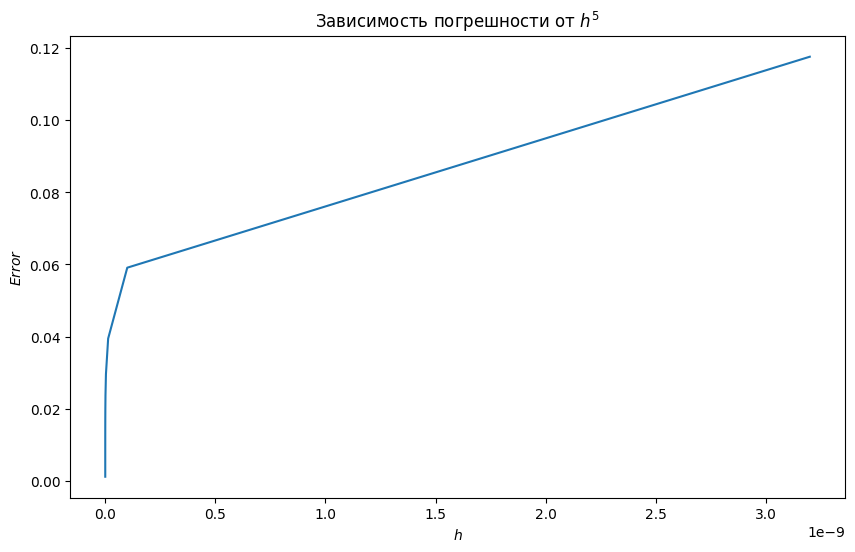

In [26]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(hs**5, max_errors)
plt.xlabel('$h$')
plt.ylabel('$Error$')
plt.title("Зависимость погрешности от $h^5$")

Text(0.5, 1.0, 'Зависимость отношения $Error/h^5$ от шага h')

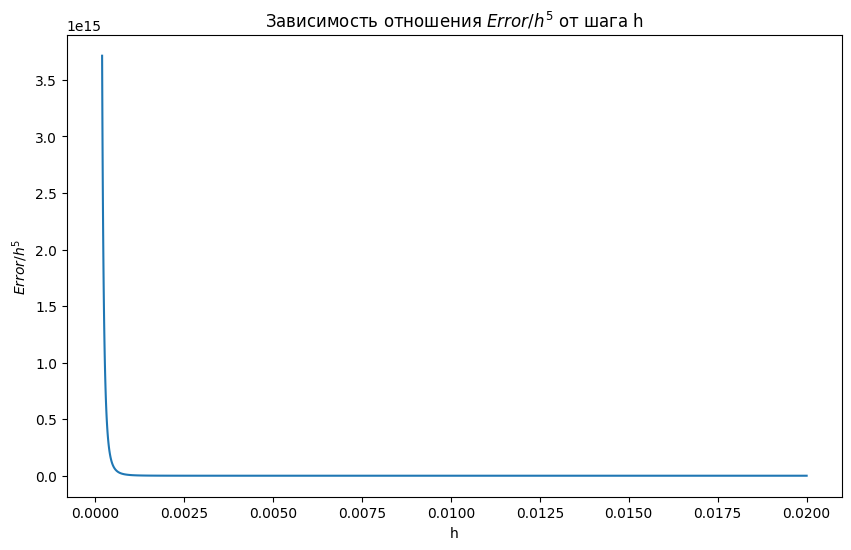

In [20]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(hs, max_errors_h)
plt.xlabel('h')
plt.ylabel('$Error/h^5$')
plt.title("Зависимость отношения $Error/h^5$ от шага h")

In [8]:
alphas = [np.log10(max_errors[i+1]/max_errors[i])/np.log10(hs[i+1]/hs[i]) for i in range(len(hs)-1)]
alphas

[0.991981719801887,
 0.9956495827784719,
 0.996991808541024,
 0.9976967884231093,
 0.9979722476157178,
 0.9983352668264985,
 0.9985938610623938,
 0.9987837216269879,
 0.9989288647559379,
 0.998966242636572,
 0.9990620550745627,
 0.999156837630053,
 0.9992348275220979,
 0.999300037603891,
 0.9993115283741104,
 0.9993455890019893,
 0.9993966387887759,
 0.9994407588747621,
 0.9994792235243871,
 0.9994871062324975,
 0.999496723967865,
 0.9995295513734979,
 0.9995587255003564,
 0.9995847955722363,
 0.9995934382337085,
 0.9995906619660919,
 0.999614029653997,
 0.9996351787371429,
 0.9996543922886723,
 0.9996647480423462,
 0.9996547106825154,
 0.9996724714136732,
 0.9996887556572954,
 0.9997037270686093,
 0.9997158938458288,
 0.9997011789123842,
 0.9997153075796867,
 0.9997283884417386,
 0.999740524472824,
 0.9997518065041976,
 0.9997390587181628,
 0.9997480530837075,
 0.9997588943002275,
 0.9997690252480371,
 0.9997785070357841,
 0.9997700804612505,
 0.999773897817515,
 0.99978310081559,
 0.

## Основная задача

In [27]:
def f(t, y):
    global lmbda, beta, c0, T0
    c = y[0]
    T = y[1]
    return np.array([
         -c*np.exp(-1/T) + lmbda*(c0-c),
         c*np.exp(-1/T) + beta*(T0-T)
    ])

In [28]:
a, b, N = 0, 15, 100
h = (b-a)/N

c0, T0, lmbda, beta = 120, 0.23, 0.45, 45

ya = np.array([c0, T0])

y_calc = Runge_Kutta(a, b, h, f, ya)
nodes = np.arange(a, b+1e-15, h)
c = y_calc[:, 0]
T = y_calc[:, 1]

Text(0.5, 1.0, 'График решения в фазовом пространстве $(с, T)$')

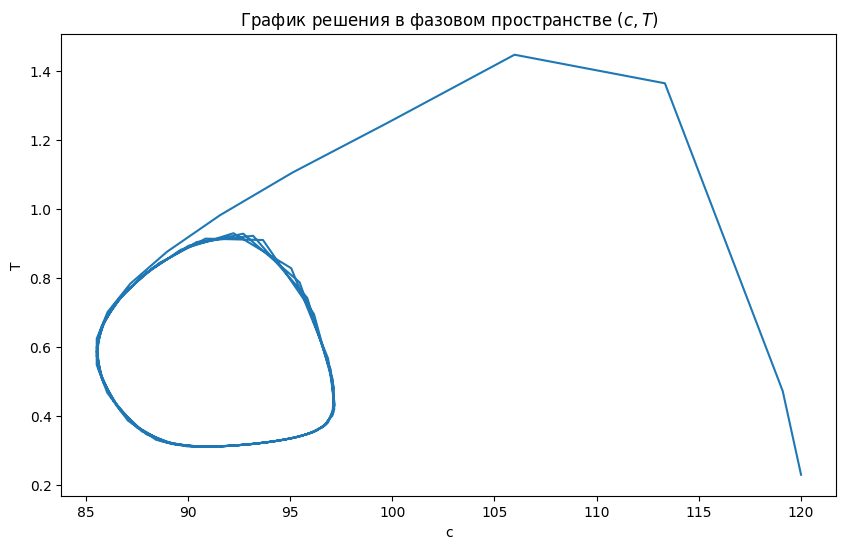

In [31]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(c, T)
plt.xlabel('c')
plt.ylabel('T')
plt.title("График решения в фазовом пространстве $(с, T)$")

Text(0, 0.5, 'T')

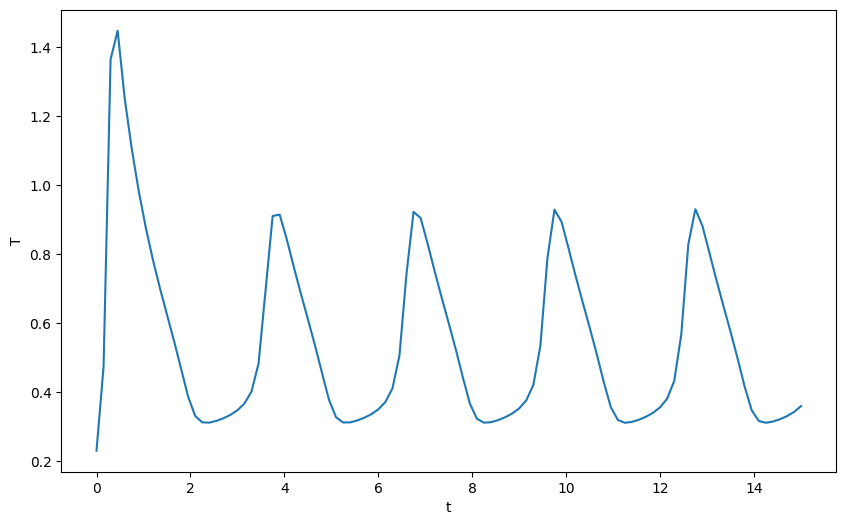

In [12]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(nodes, T)
plt.xlabel('t')
plt.ylabel('T')

Text(0, 0.5, 'T')

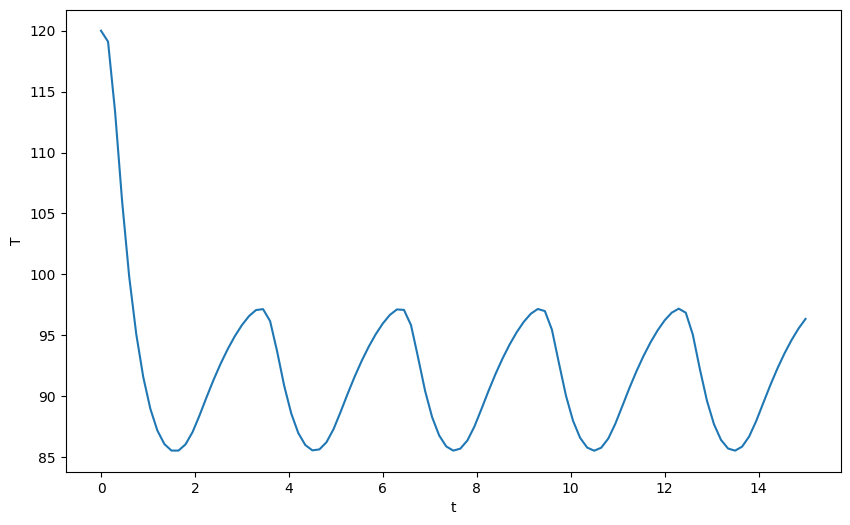

In [13]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.plot(nodes, c)
plt.xlabel('t')
plt.ylabel('T')

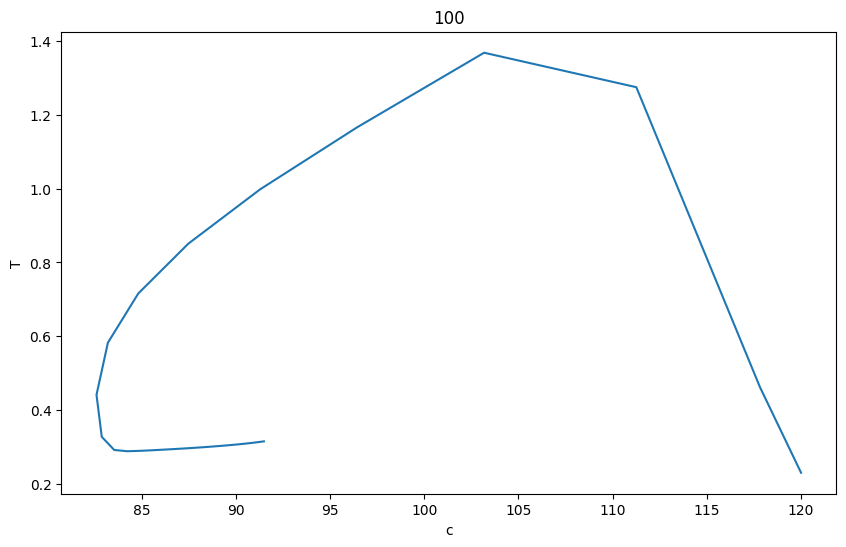

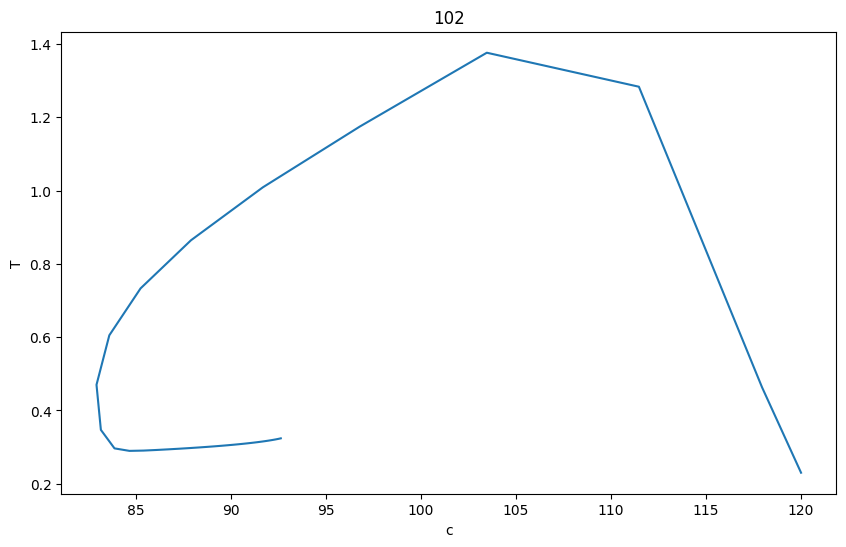

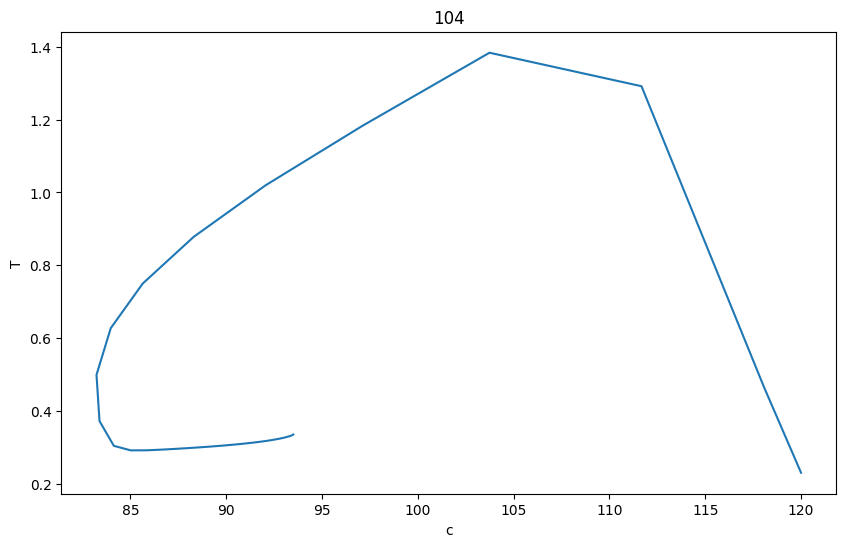

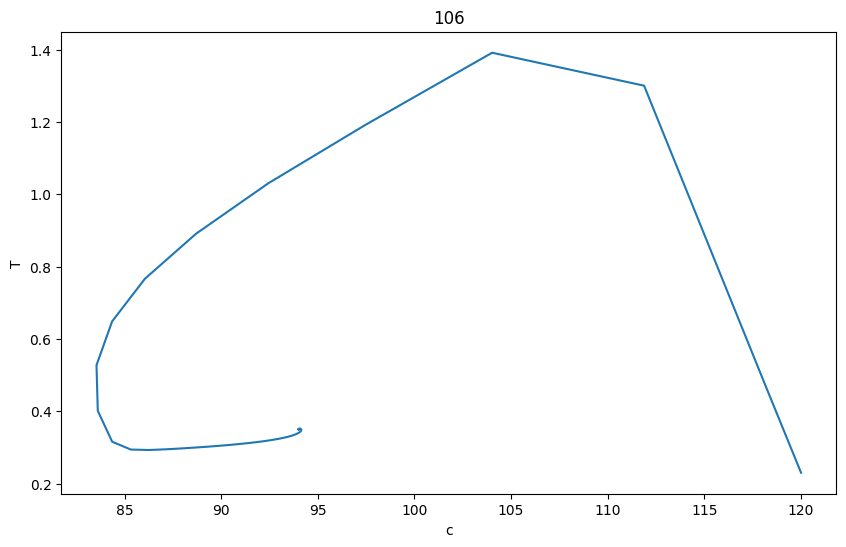

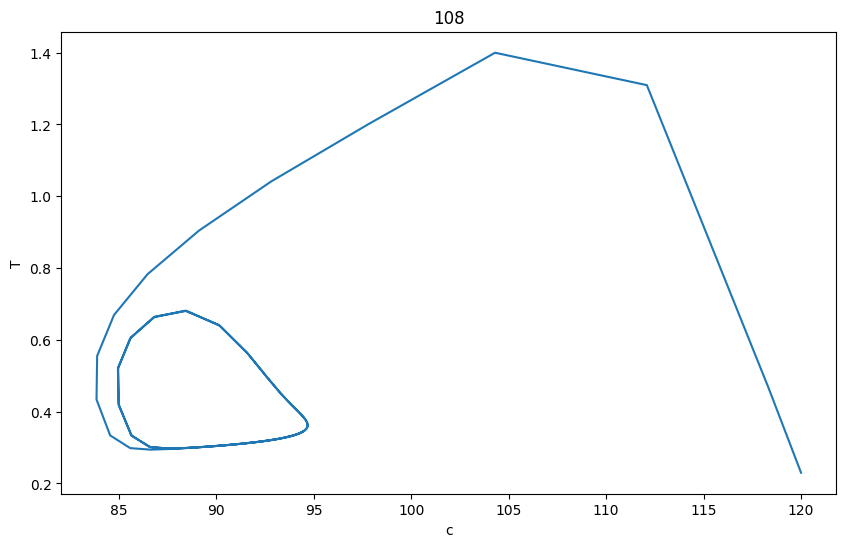

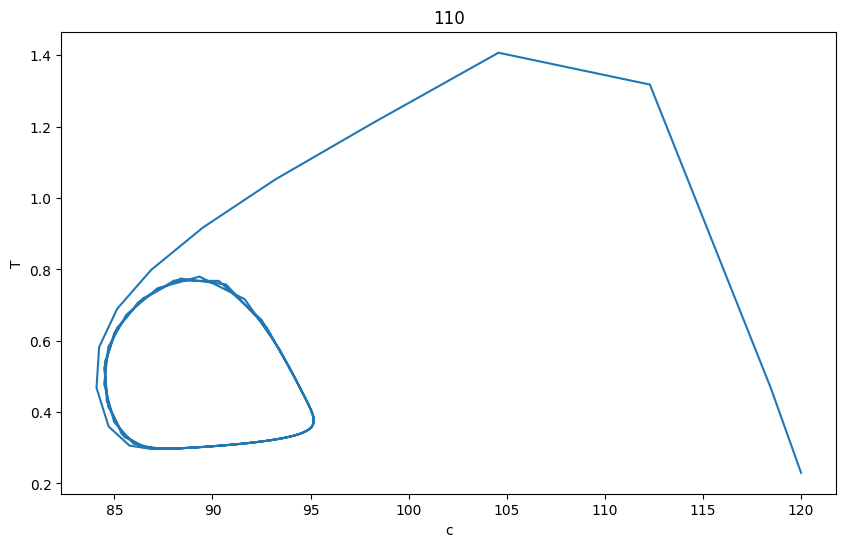

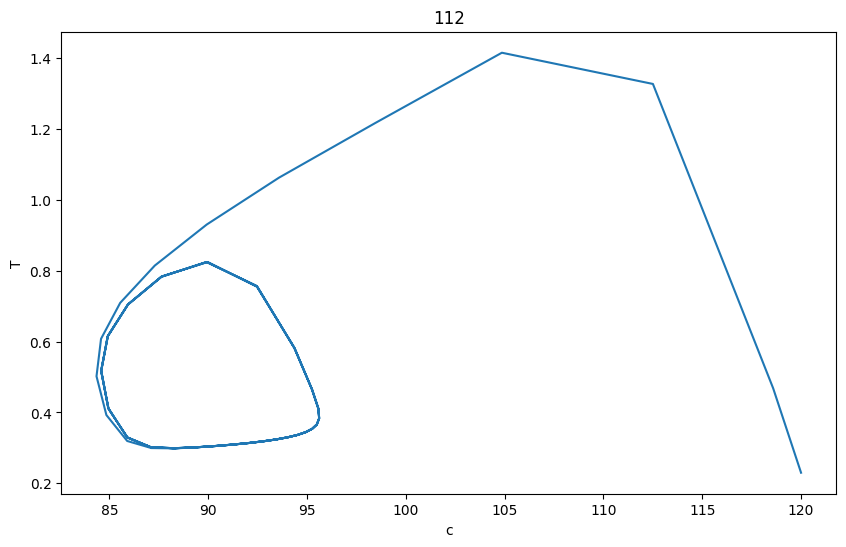

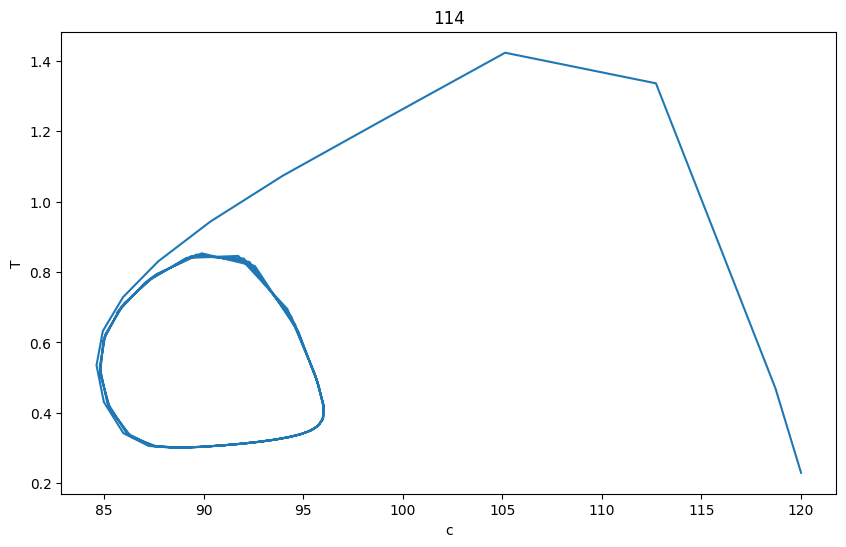

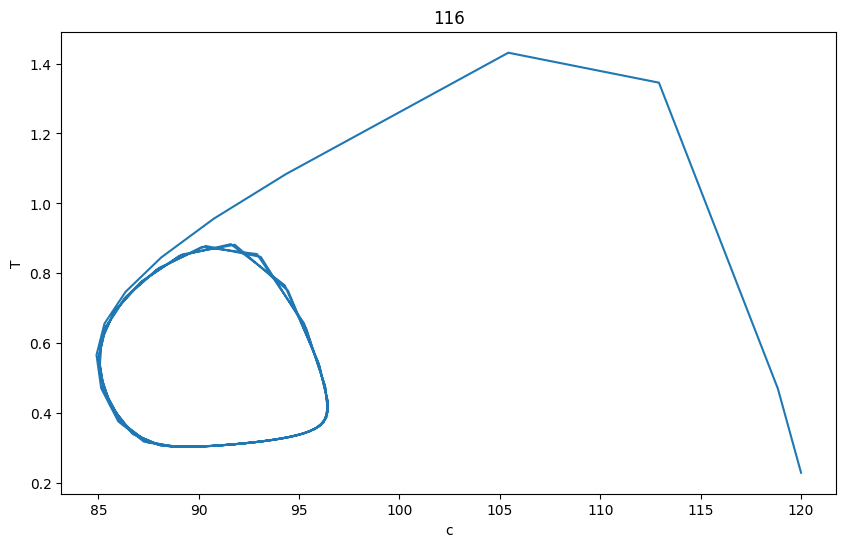

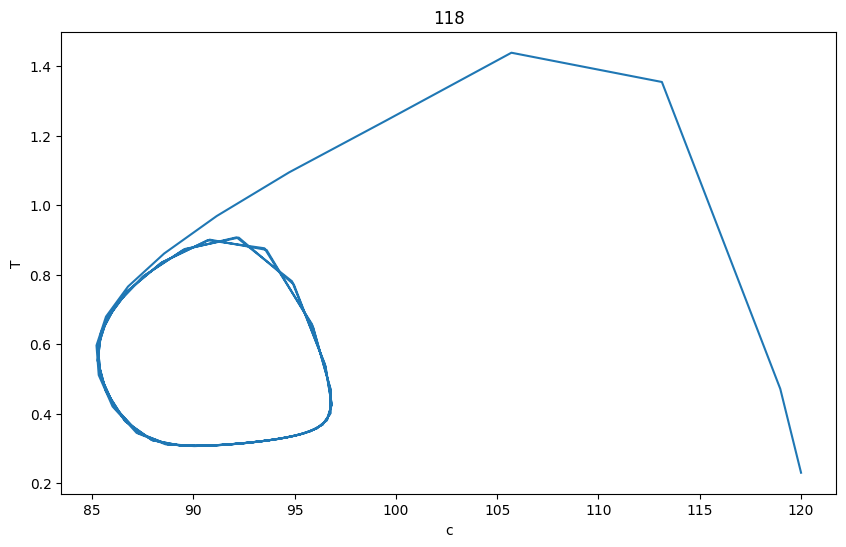

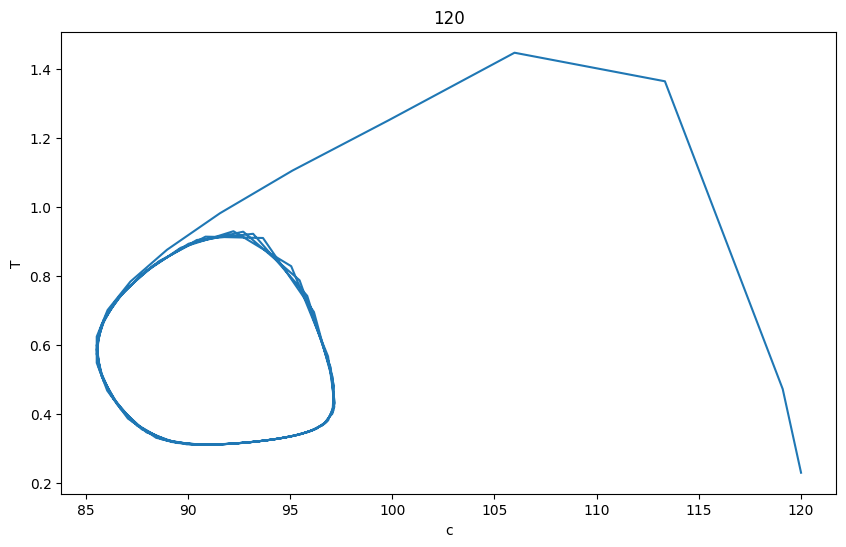

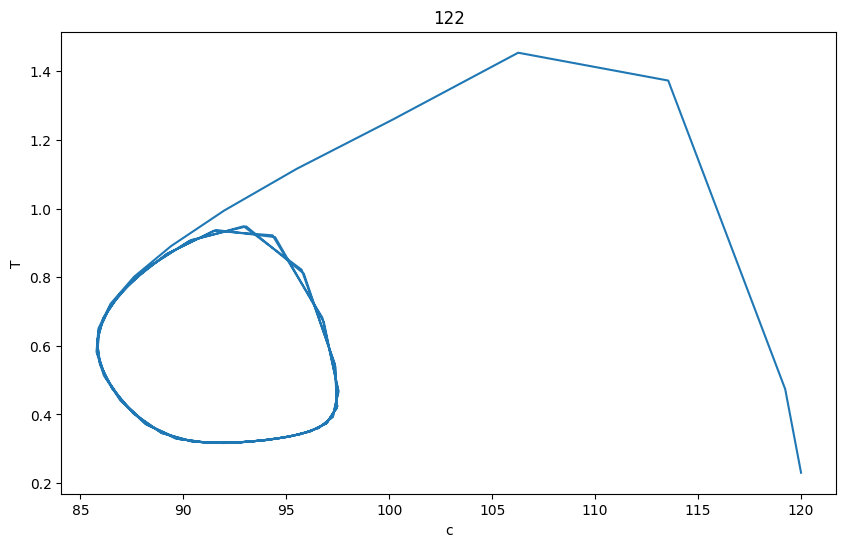

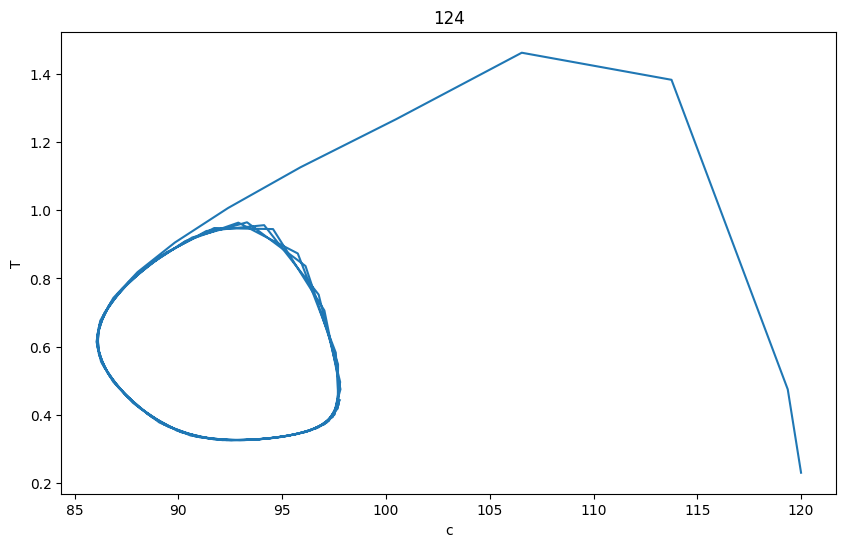

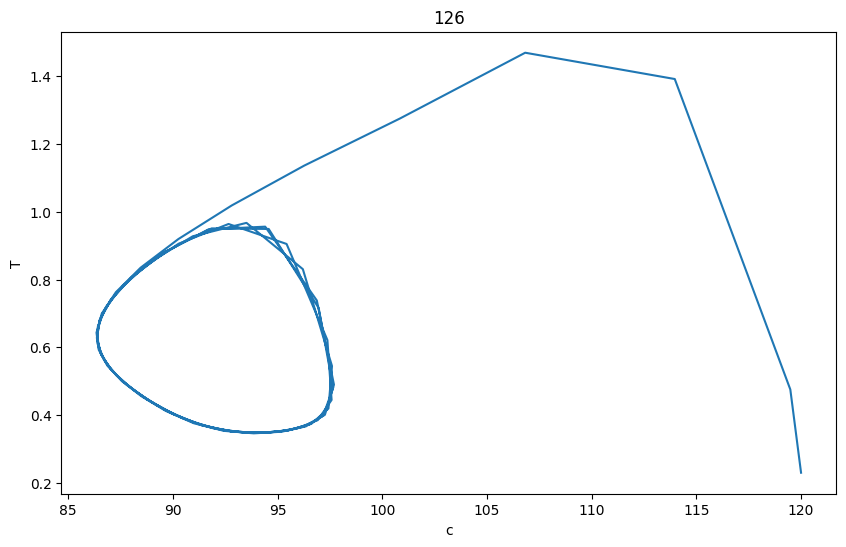

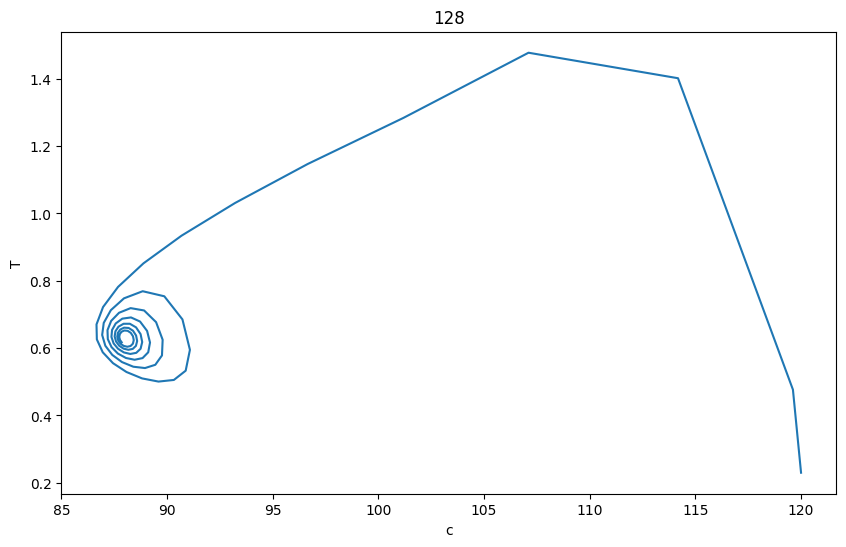

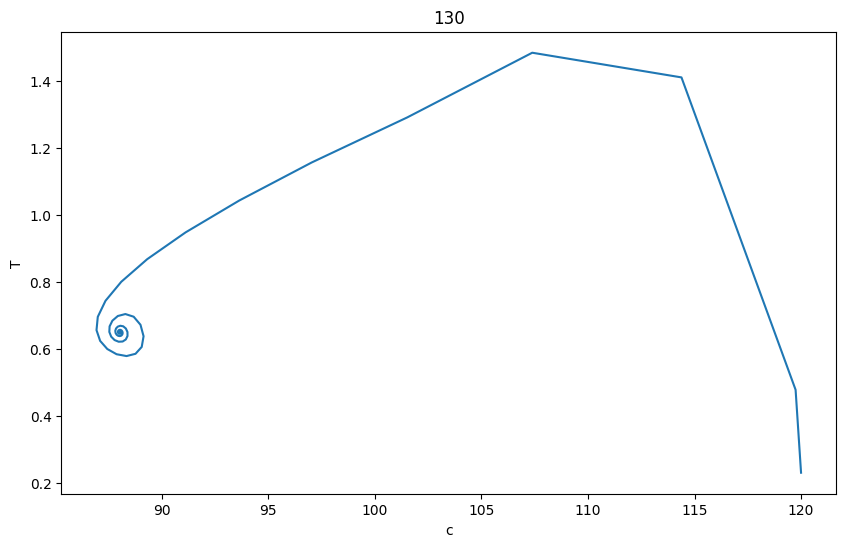

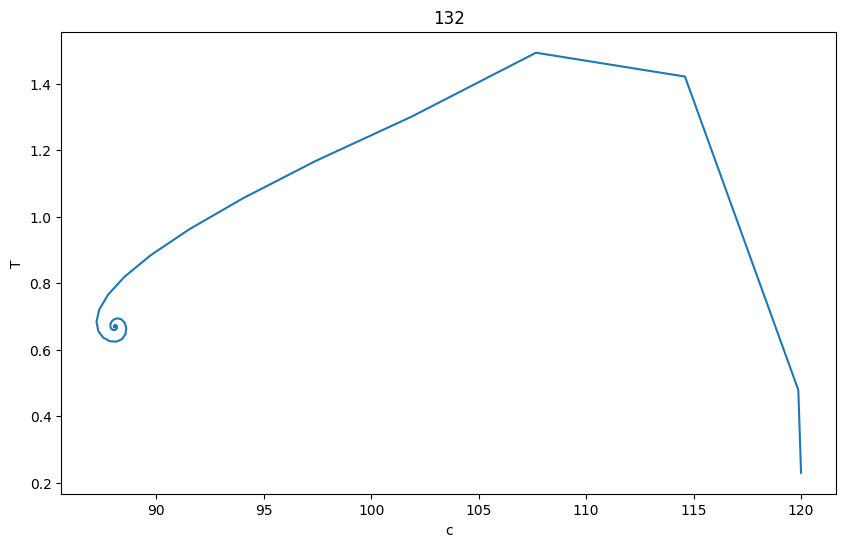

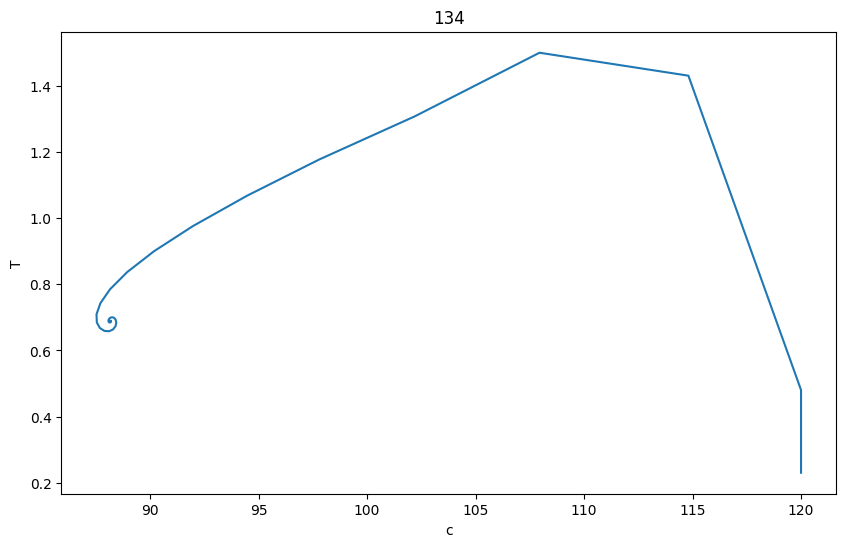

In [32]:
for c0 in range(100, 136, 2):
    y_calc = Runge_Kutta(a, b, h, f, ya)
    nodes = np.arange(a, b+1e-15, h)
    c = y_calc[:, 0]
    T = y_calc[:, 1]
    plt.rcParams['figure.figsize'] = (10, 6)
    plt.plot(c, T)
    plt.title(c0)
    plt.xlabel('c')
    plt.ylabel('T')
    plt.show()